# Importing packages and Loading dataset

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [2]:
df_pricing = pd.read_csv("train.csv")
df_pricing_test = pd.read_csv('test.csv')
output = df_pricing["SalePrice"]
df_pricing_one = pd.concat([df_pricing,df_pricing_test],axis=0,sort=False)
df_pricing_one.drop(["SalePrice"],axis = 1,inplace =True)


# ***Identifying Missing Values***
code below will give us the missing value count with percentage

In [3]:
missing_values = df_pricing_one.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
NAN_col = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(df_pricing_one)
missing_values_data

,Feature,Number of Missing Values,Percentage of Missing Values
0,PoolQC,2909,99.657417
1,MiscFeature,2814,96.402878
2,Alley,2721,93.216855
3,Fence,2348,80.438506
4,FireplaceQu,1420,48.646797
5,LotFrontage,486,16.649538
6,GarageFinish,159,5.447071
7,GarageQual,159,5.447071
8,GarageCond,159,5.447071
9,GarageYrBlt,159,5.447071


# Removing columns with most missing value

In [4]:
df_pricing_one.drop(["PoolQC"],axis = 1,inplace =True)
df_pricing_one.drop(["MiscFeature"],axis = 1,inplace =True)
df_pricing_one.drop(["Alley"],axis = 1,inplace =True)
df_pricing_one.drop(["Fence"],axis = 1,inplace =True)
df_pricing_one.drop(["FireplaceQu"],axis = 1,inplace =True)
df_pricing_one.drop(["Id"],axis = 1,inplace =True)

# Filling low propability missing values with suitable value

In [5]:
df_pricing_one['BsmtFinSF1'].fillna(0, inplace=True)
df_pricing_one['BsmtFinSF2'].fillna(0, inplace=True)
df_pricing_one['TotalBsmtSF'].fillna(0, inplace=True)
df_pricing_one['BsmtUnfSF'].fillna(0, inplace=True)
df_pricing_one['Electrical'].fillna('FuseA',inplace = True)
df_pricing_one['KitchenQual'].fillna('TA',inplace=True)
df_pricing_one['LotFrontage'].fillna(df_pricing_one.groupby('1stFlrSF')['LotFrontage'].transform('mean'),inplace=True)
df_pricing_one['LotFrontage'].interpolate(method='linear',inplace=True)
df_pricing_one['MasVnrArea'].fillna(df_pricing_one.groupby('MasVnrType')['MasVnrArea'].transform('mean'),inplace=True)
df_pricing_one['MasVnrArea'].interpolate(method='linear',inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_pricing_one.to_dict().keys():
    data_type = df_pricing_one[col].dtype
    if data_type == 'object':
        df_pricing_one[col].fillna('NA',inplace=True)
        label = le.fit_transform(df_pricing_one[col])
        df_pricing_one.drop(col, axis=1, inplace=True)
        df_pricing_one[col] = label
        
    else:
        #data_with_imputed_values = pd.DataFrame(imputer.fit_transform(df_pricing.select_dtypes(exclude=['object'])))
        df_pricing_one[col].fillna(df_pricing_one[col].mean(),inplace=True)
        

In [7]:
df_pricing_one.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,4,2,7,1,2,5,5,2,9,4
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,4,3,7,1,2,5,5,2,9,4
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,4,2,7,1,2,5,5,2,9,4
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,4,2,7,5,3,5,5,2,9,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,4,2,7,1,2,5,5,2,9,4


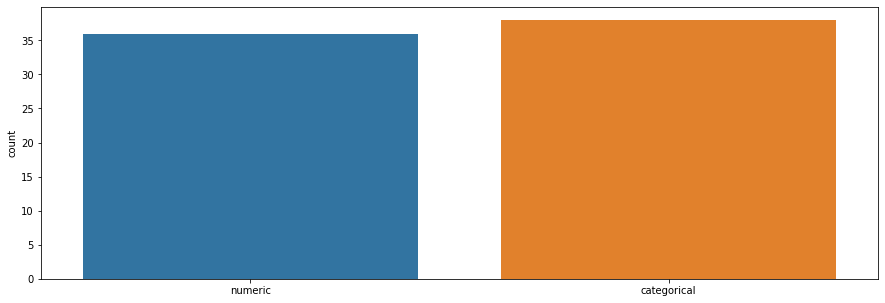

In [8]:
import matplotlib.pyplot as plt
column_data_type = []
for col in df_pricing_one.columns:
    data_type = df_pricing_one[col].dtype
    if df_pricing_one[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(15,5))
sns.countplot(x=column_data_type)
plt.show()

In [9]:
train = df_pricing_one[:1460].copy()
test = df_pricing_one[1460:].copy()
#train['SalePrice'] = output
#train.drop(["SalePrice"],axis = 1,inplace =True)
train.shape

(1460, 74)

# Model

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(train.shape[1])))
model.add(tf.keras.layers.Dense(384, activation='relu'))
model.add(tf.keras.layers.Dense(352, activation='relu'))
model.add(tf.keras.layers.Dense(448, activation='relu'))
model.add(tf.keras.layers.Dense(160, activation='relu'))
model.add(tf.keras.layers.Dense(160, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'mse')

In [12]:
model.fit(train,output,validation_split=0.1,
          batch_size=64,epochs=1000)

Epoch 1/1000
21/21 [==============================] - 2s 34ms/step - loss: 38716801024.0000 - val_loss: 34816884736.0000
Epoch 2/1000
21/21 [==============================] - 0s 12ms/step - loss: 36500242432.0000 - val_loss: 31184599040.0000
Epoch 3/1000
21/21 [==============================] - 0s 12ms/step - loss: 29552351232.0000 - val_loss: 20045559808.0000
Epoch 4/1000
21/21 [==============================] - 0s 12ms/step - loss: 16571078656.0000 - val_loss: 7504588800.0000
Epoch 5/1000
21/21 [==============================] - 0s 11ms/step - loss: 14719895552.0000 - val_loss: 6158544384.0000
Epoch 6/1000
21/21 [==============================] - 0s 12ms/step - loss: 11407325184.0000 - val_loss: 6612220416.0000
Epoch 7/1000
21/21 [==============================] - 0s 10ms/step - loss: 10095045632.0000 - val_loss: 4965235712.0000
Epoch 8/1000
21/21 [==============================] - 0s 14ms/step - loss: 8603966464.0000 - val_loss: 4318657024.0000
Epoch 9/1000
21/21 [==================

21/21 [==============================] - 0s 13ms/step - loss: 1380677504.0000 - val_loss: 1237429376.0000
Epoch 138/1000
21/21 [==============================] - 0s 11ms/step - loss: 1377213440.0000 - val_loss: 1208649088.0000
Epoch 139/1000
21/21 [==============================] - 0s 11ms/step - loss: 1348186240.0000 - val_loss: 1183398400.0000
Epoch 140/1000
21/21 [==============================] - 0s 12ms/step - loss: 1307456512.0000 - val_loss: 1176902656.0000
Epoch 141/1000
21/21 [==============================] - 0s 11ms/step - loss: 1312154112.0000 - val_loss: 1255782528.0000
Epoch 142/1000
21/21 [==============================] - 0s 11ms/step - loss: 1330668160.0000 - val_loss: 1335218304.0000
Epoch 143/1000
21/21 [==============================] - 0s 12ms/step - loss: 1291834880.0000 - val_loss: 1188468224.0000
Epoch 144/1000
21/21 [==============================] - 0s 12ms/step - loss: 1306145152.0000 - val_loss: 1195135616.0000
Epoch 145/1000
21/21 [=========================

Epoch 205/1000
21/21 [==============================] - 0s 12ms/step - loss: 1175561344.0000 - val_loss: 1459948160.0000
Epoch 206/1000
21/21 [==============================] - 0s 11ms/step - loss: 1164626432.0000 - val_loss: 1438340352.0000
Epoch 207/1000
21/21 [==============================] - 0s 12ms/step - loss: 1180849152.0000 - val_loss: 1244317952.0000
Epoch 208/1000
21/21 [==============================] - 0s 12ms/step - loss: 1190812416.0000 - val_loss: 1239540608.0000
Epoch 209/1000
21/21 [==============================] - 0s 12ms/step - loss: 1178137216.0000 - val_loss: 1336481024.0000
Epoch 210/1000
21/21 [==============================] - 0s 12ms/step - loss: 1132440192.0000 - val_loss: 1397590016.0000
Epoch 211/1000
21/21 [==============================] - 0s 12ms/step - loss: 1149289088.0000 - val_loss: 1258741120.0000
Epoch 212/1000
21/21 [==============================] - 0s 12ms/step - loss: 1137480064.0000 - val_loss: 1260822016.0000
Epoch 213/1000
21/21 [==========

21/21 [==============================] - 0s 11ms/step - loss: 922390400.0000 - val_loss: 1235345664.0000
Epoch 341/1000
21/21 [==============================] - 0s 12ms/step - loss: 902129152.0000 - val_loss: 1370935296.0000
Epoch 342/1000
21/21 [==============================] - 0s 12ms/step - loss: 896792832.0000 - val_loss: 1431365760.0000
Epoch 343/1000
21/21 [==============================] - 0s 12ms/step - loss: 904775552.0000 - val_loss: 1225054464.0000
Epoch 344/1000
21/21 [==============================] - 0s 12ms/step - loss: 898617536.0000 - val_loss: 1425965568.0000
Epoch 345/1000
21/21 [==============================] - 0s 12ms/step - loss: 891894080.0000 - val_loss: 1202646656.0000
Epoch 346/1000
21/21 [==============================] - 0s 11ms/step - loss: 900177280.0000 - val_loss: 1250581120.0000
Epoch 347/1000
21/21 [==============================] - 0s 11ms/step - loss: 879882752.0000 - val_loss: 1302739584.0000
Epoch 348/1000
21/21 [==============================] -

21/21 [==============================] - 0s 12ms/step - loss: 659165696.0000 - val_loss: 1015450944.0000
Epoch 477/1000
21/21 [==============================] - 0s 12ms/step - loss: 646430272.0000 - val_loss: 1009264704.0000
Epoch 478/1000
21/21 [==============================] - 0s 12ms/step - loss: 635947328.0000 - val_loss: 1179185152.0000
Epoch 479/1000
21/21 [==============================] - 0s 12ms/step - loss: 665543744.0000 - val_loss: 1167990656.0000
Epoch 480/1000
21/21 [==============================] - 0s 12ms/step - loss: 666842176.0000 - val_loss: 1090789120.0000
Epoch 481/1000
21/21 [==============================] - 0s 12ms/step - loss: 640464704.0000 - val_loss: 1049734912.0000
Epoch 482/1000
21/21 [==============================] - 0s 12ms/step - loss: 617745472.0000 - val_loss: 965051968.0000
Epoch 483/1000
21/21 [==============================] - 0s 12ms/step - loss: 635295040.0000 - val_loss: 1175390848.0000
Epoch 484/1000
21/21 [==============================] - 

Epoch 613/1000
21/21 [==============================] - 0s 12ms/step - loss: 481298144.0000 - val_loss: 909230784.0000
Epoch 614/1000
21/21 [==============================] - 0s 13ms/step - loss: 486582112.0000 - val_loss: 931758592.0000
Epoch 615/1000
21/21 [==============================] - 0s 12ms/step - loss: 475396640.0000 - val_loss: 826974528.0000
Epoch 616/1000
21/21 [==============================] - 0s 12ms/step - loss: 457857024.0000 - val_loss: 840466560.0000
Epoch 617/1000
21/21 [==============================] - 0s 13ms/step - loss: 474276800.0000 - val_loss: 859358336.0000
Epoch 618/1000
21/21 [==============================] - 0s 12ms/step - loss: 455972608.0000 - val_loss: 1174656640.0000
Epoch 619/1000
21/21 [==============================] - 0s 12ms/step - loss: 486158976.0000 - val_loss: 830957632.0000
Epoch 620/1000
21/21 [==============================] - 0s 12ms/step - loss: 468912064.0000 - val_loss: 887114944.0000
Epoch 621/1000
21/21 [=========================

Epoch 682/1000
21/21 [==============================] - 0s 12ms/step - loss: 483425152.0000 - val_loss: 1429978624.0000
Epoch 683/1000
21/21 [==============================] - 0s 12ms/step - loss: 571555328.0000 - val_loss: 854808000.0000
Epoch 684/1000
21/21 [==============================] - 0s 12ms/step - loss: 469300608.0000 - val_loss: 1010897856.0000
Epoch 685/1000
21/21 [==============================] - 0s 13ms/step - loss: 432036256.0000 - val_loss: 810040192.0000
Epoch 686/1000
21/21 [==============================] - 0s 12ms/step - loss: 438292992.0000 - val_loss: 807955648.0000
Epoch 687/1000
21/21 [==============================] - 0s 13ms/step - loss: 429655904.0000 - val_loss: 902180352.0000
Epoch 688/1000
21/21 [==============================] - 0s 12ms/step - loss: 441960480.0000 - val_loss: 901559424.0000
Epoch 689/1000
21/21 [==============================] - 0s 13ms/step - loss: 508935712.0000 - val_loss: 957204032.0000
Epoch 690/1000
21/21 [========================

Epoch 751/1000
21/21 [==============================] - 0s 12ms/step - loss: 421971008.0000 - val_loss: 820988416.0000
Epoch 752/1000
21/21 [==============================] - 0s 12ms/step - loss: 414542976.0000 - val_loss: 814099904.0000
Epoch 753/1000
21/21 [==============================] - 0s 12ms/step - loss: 391585600.0000 - val_loss: 932485440.0000
Epoch 754/1000
21/21 [==============================] - 0s 12ms/step - loss: 422601472.0000 - val_loss: 809494272.0000
Epoch 755/1000
21/21 [==============================] - 0s 11ms/step - loss: 401800256.0000 - val_loss: 1015547520.0000
Epoch 756/1000
21/21 [==============================] - 0s 12ms/step - loss: 476915392.0000 - val_loss: 847565056.0000
Epoch 757/1000
21/21 [==============================] - 0s 12ms/step - loss: 406223456.0000 - val_loss: 961725632.0000
Epoch 758/1000
21/21 [==============================] - 0s 12ms/step - loss: 390975712.0000 - val_loss: 881900352.0000
Epoch 759/1000
21/21 [=========================

Epoch 820/1000
21/21 [==============================] - 0s 11ms/step - loss: 468898944.0000 - val_loss: 999946368.0000
Epoch 821/1000
21/21 [==============================] - 0s 11ms/step - loss: 393627008.0000 - val_loss: 842721152.0000
Epoch 822/1000
21/21 [==============================] - 0s 11ms/step - loss: 367703648.0000 - val_loss: 869220736.0000
Epoch 823/1000
21/21 [==============================] - 0s 11ms/step - loss: 364812512.0000 - val_loss: 839014592.0000
Epoch 824/1000
21/21 [==============================] - 0s 11ms/step - loss: 401801024.0000 - val_loss: 826841984.0000
Epoch 825/1000
21/21 [==============================] - 0s 11ms/step - loss: 386071648.0000 - val_loss: 849056576.0000
Epoch 826/1000
21/21 [==============================] - 0s 12ms/step - loss: 359490656.0000 - val_loss: 860570048.0000
Epoch 827/1000
21/21 [==============================] - 0s 11ms/step - loss: 349447584.0000 - val_loss: 826987264.0000
Epoch 828/1000
21/21 [==========================

Epoch 889/1000
21/21 [==============================] - 0s 13ms/step - loss: 364460000.0000 - val_loss: 842671424.0000
Epoch 890/1000
21/21 [==============================] - 0s 12ms/step - loss: 366850112.0000 - val_loss: 863514368.0000
Epoch 891/1000
21/21 [==============================] - 0s 12ms/step - loss: 353449248.0000 - val_loss: 900431872.0000
Epoch 892/1000
21/21 [==============================] - 0s 12ms/step - loss: 387295936.0000 - val_loss: 828886208.0000
Epoch 893/1000
21/21 [==============================] - 0s 13ms/step - loss: 390830592.0000 - val_loss: 866301120.0000
Epoch 894/1000
21/21 [==============================] - 0s 12ms/step - loss: 380700576.0000 - val_loss: 835318272.0000
Epoch 895/1000
21/21 [==============================] - 0s 12ms/step - loss: 378542144.0000 - val_loss: 860745984.0000
Epoch 896/1000
21/21 [==============================] - 0s 12ms/step - loss: 350275776.0000 - val_loss: 851908608.0000
Epoch 897/1000
21/21 [==========================

Epoch 958/1000
21/21 [==============================] - 0s 13ms/step - loss: 333869184.0000 - val_loss: 857735104.0000
Epoch 959/1000
21/21 [==============================] - 0s 12ms/step - loss: 336171104.0000 - val_loss: 860167232.0000
Epoch 960/1000
21/21 [==============================] - 0s 13ms/step - loss: 349584800.0000 - val_loss: 854200832.0000
Epoch 961/1000
21/21 [==============================] - 0s 12ms/step - loss: 354773792.0000 - val_loss: 861179648.0000
Epoch 962/1000
21/21 [==============================] - 0s 12ms/step - loss: 331316544.0000 - val_loss: 912998528.0000
Epoch 963/1000
21/21 [==============================] - 0s 13ms/step - loss: 333705824.0000 - val_loss: 884380288.0000
Epoch 964/1000
21/21 [==============================] - 0s 12ms/step - loss: 321300576.0000 - val_loss: 865538240.0000
Epoch 965/1000
21/21 [==============================] - 0s 12ms/step - loss: 331252288.0000 - val_loss: 858713792.0000
Epoch 966/1000
21/21 [==========================

In [13]:
result = model.predict(train) # Prediction using model
result = pd.DataFrame(result,columns=['SalePrice']) # Dataframe
result['Id'] = df_pricing['Id'] # Adding ID to our result dataframe.
result = result[['Id','SalePrice']]
result.head()

46/46 [==============================] - 6s 5ms/step


,Id,SalePrice
0,1,206329.218750
1,2,178674.093750
2,3,214343.109375
3,4,151406.062500
4,5,291295.093750


In [14]:
result["orginal_price"] = df_pricing['SalePrice']

In [15]:
result.head()

,Id,SalePrice,orginal_price
0,1,206329.218750,208500
1,2,178674.093750,181500
2,3,214343.109375,223500
3,4,151406.062500,140000
4,5,291295.093750,250000


In [18]:
result = model.predict(test) # Prediction using model
result = pd.DataFrame(result,columns=['SalePrice']) # Dataframe
result['Id'] = df_pricing_test['Id'] # Adding ID to our result dataframe.
result = result[['Id','SalePrice']]
result.head()

46/46 [==============================] - 0s 4ms/step


,Id,SalePrice
0,1461,127391.804688
1,1462,178344.812500
2,1463,198116.906250
3,1464,182730.156250
4,1465,175181.906250


In [19]:
result.to_csv('house_prices_submission.csv', index=False)